<a href="https://colab.research.google.com/github/UTKARSHSAHAREE/Utkarshsahare/blob/main/Intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
mylist=[19,28,37]
res=pd.Series(mylist)
print("Series = \n",res)

Series = 
 0    19
1    28
2    37
dtype: int64


In [ ]:
import numpy as np

In [ ]:
arr=np.array(( 1, 2, 3))
print("Array=",arr)
print(type(arr))

Array= [1 2 3]
<class 'numpy.ndarray'>


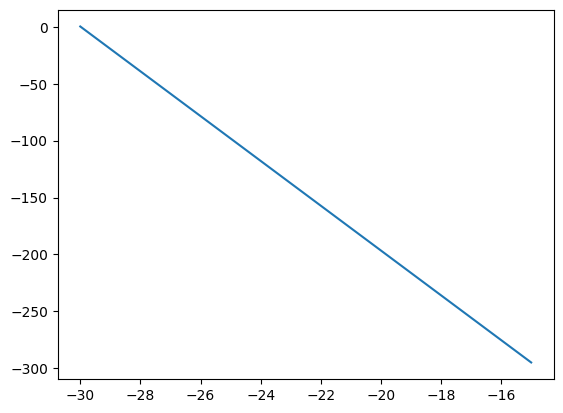

In [ ]:
import matplotlib.pyplot as plt
xpts=np.array([-15,-30])
ypts=np.array([-295,0.333])
plt.plot(xpts,ypts)
plt.show()

In [ ]:
demo=("Amit","Craig","Ronaldo","Messi")
demo2=(10,20,30,40,30)
print(demo)
print(demo2)

('Amit', 'Craig', 'Ronaldo', 'Messi')
(10, 20, 30, 40, 30)


In [ ]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

def load_housing_data():
  tarball_path = Path("datasets/housing.tgz")

  if not tarball_path.is_file():
    Path("datasets").mkdir(parents=True, exist_ok=True)
    url = "https://github.com/ageron/data/raw/main/housing.tgz"
    urllib.request.urlretrieve(url, tarball_path)
    with tarfile.open(tarball_path) as housing_tarball:
      housing_tarball.extractall(path="datasets")
  return pd.read_csv(Path("datasets/housing/housing.csv"))

housing = load_housing_data()
housing.head()



,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
from zlib import crc32
def is_id_in_test_set(identifier, test_ratio):
  return crc32(np.int64(identifier))  < test_ratio * 2**32

  def split_data_with_id_hash(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: is_id_in_test_set(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

    housing_with_id = housing.reset_index()
    train_set, test_set = split_data_with_id_hash(housing_with_id, 0.2, "index")

    housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
    train_set, test_set = split_data_with_id_hash(housing_with_id, 0.2, "id")

  from sklearn.model_selection import train_test_split
  train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
  test_set.head()